In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def load_data(exp):
    df_ad = pd.read_csv(f'csvs/exp_{exp}.anc_desc.csv')
    df_dl = pd.read_csv(f'csvs/exp_{exp}.diff_lin.csv')
    df_mp3 = pd.read_csv(f'csvs/exp_{exp}.mp3.csv')
    df_ad.columns=["SASC","PSO","GP","VNS","Measure"]
    df_dl.columns=["SASC","PSO","GP","VNS","Measure"]
    df_mp3.columns=["SASC","PSO","GP","VNS","Measure"]
    df_time = pd.read_csv(f'csvs/exp_{exp}.times.csv')
    #re-order to keep color consistency
    
    return df_ad, df_dl, df_mp3, df_time

In [3]:
def boxplot(dfs, dftime, out=None, title=None, out2=None):
    f, ax = plt.subplots(1, 4, figsize=(10,3))
    for ix, df in enumerate(dfs):
        _ix = ix
        ax[_ix] = sns.boxplot(data=df, ax=ax[_ix], linewidth=1.5)
        ax[_ix] = sns.stripplot(data=df, ax=ax[_ix], alpha=.7, size=4, edgecolor="gray", linewidth=.5)
        ax[_ix].set(title=df["Measure"][0])
    ax[3] = sns.boxplot(data=dftime, x="tool", y="seconds", ax=ax[3], linewidth=1.5, order=["SASC", "PSO", "GP", "VNS"])
    # ax[3] = sns.stripplot(data=dftime, x="tool", y="seconds", ax=ax[3], order=["SASC", "PSO", "GP", "VNS"], alpha=.7, size=4, edgecolor="gray", linewidth=.5)
    ax[3].set(xlabel="", ylabel="", title="Time (s) (log)")
    ax[3].set_yscale('log')

    if title:
        f.suptitle(title)

    plt.tight_layout()
    
    if out:
        f.savefig(out)
    if out2:
        f.savefig(out2)
    return ax

## Plots for experiments with $\alpha$ = 0.15

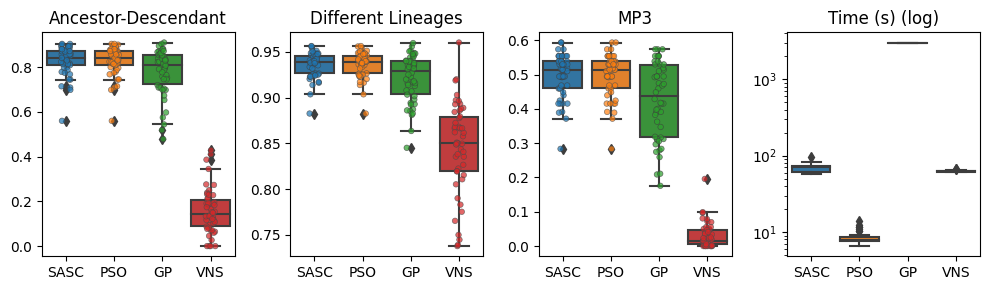

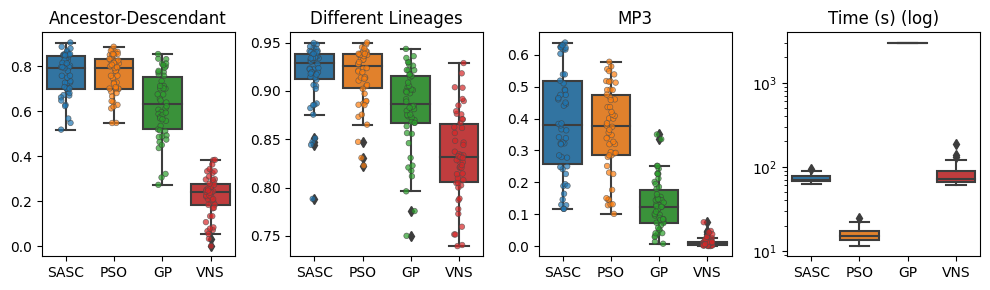

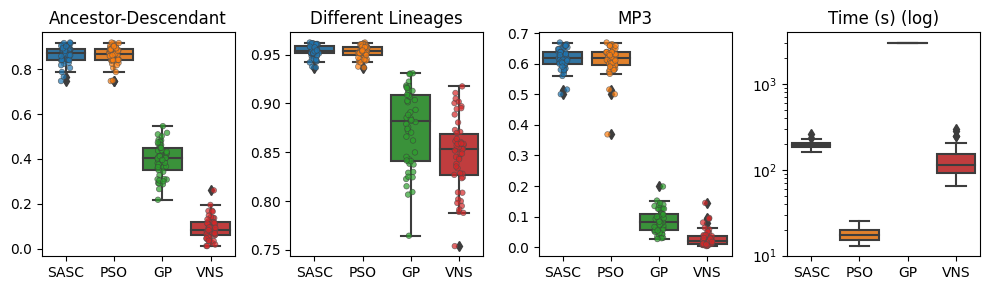

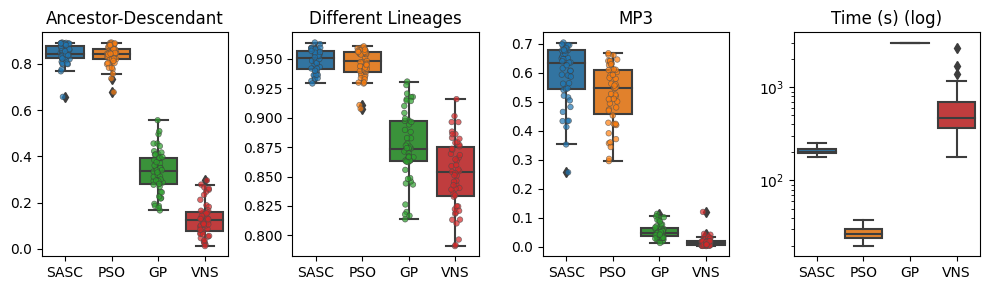

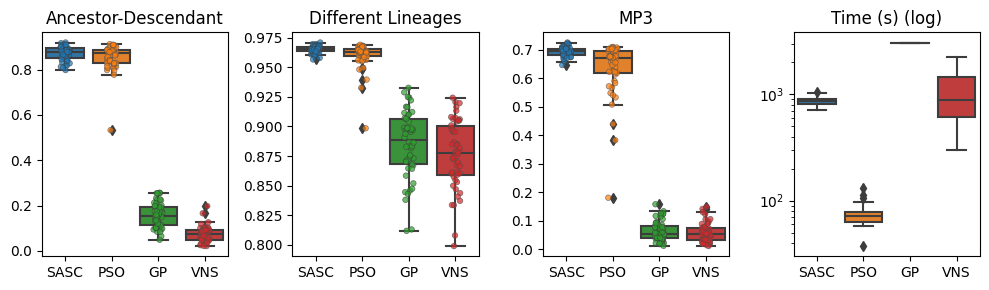

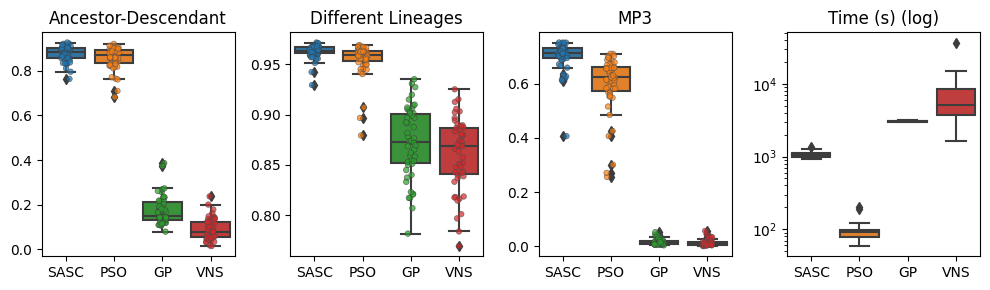

In [4]:
suppl = [" — Perfect Phylogeny", " — Dollo-3"]
for ix, exp in enumerate(["m15_n50_pp", "m15_n50_k3", "m30_n100_pp", "m30_n100_k3", "m50_n200_pp", "m50_n200_k3"]):
    df_ad, df_dl, df_mp3, df_time = load_data(exp)
    boxplot([df_ad, df_dl, df_mp3], df_time, out=f'plots/exp.{exp}.pdf', 
    out2=f'plots/exp.{ix+1}.pdf'
    )


## Plots for experiments with $\alpha$ = 0.2

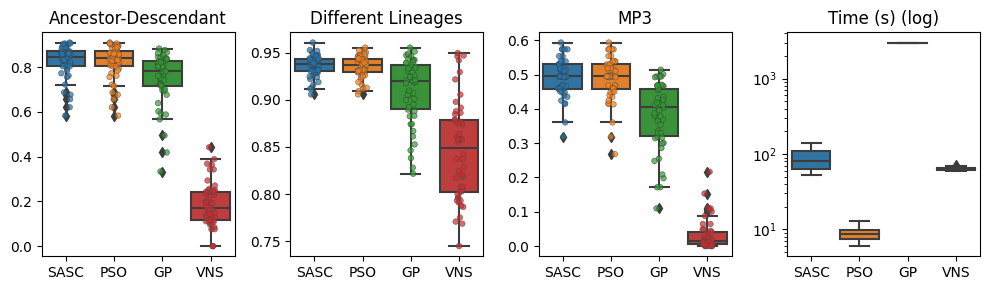

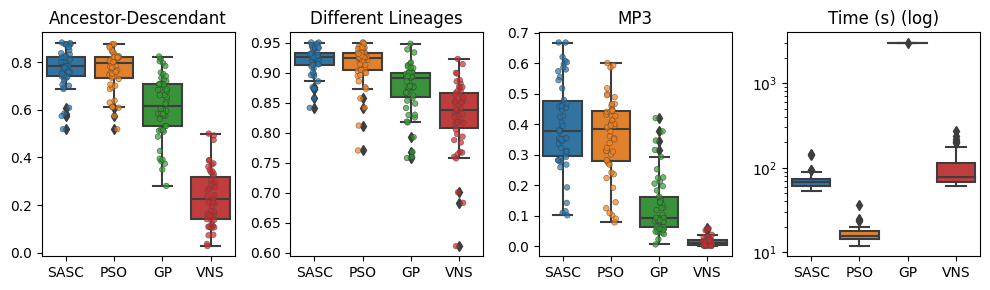

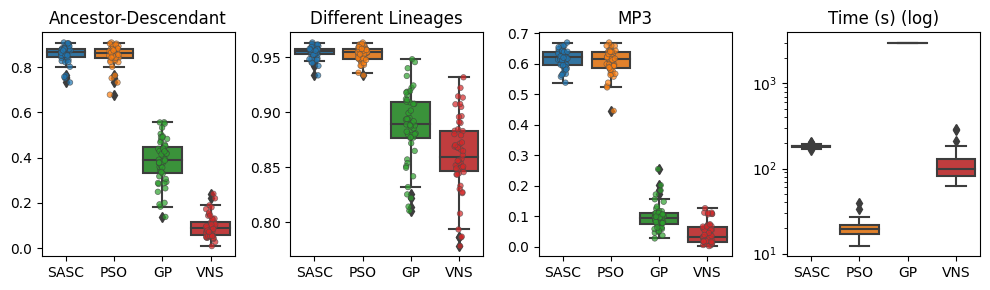

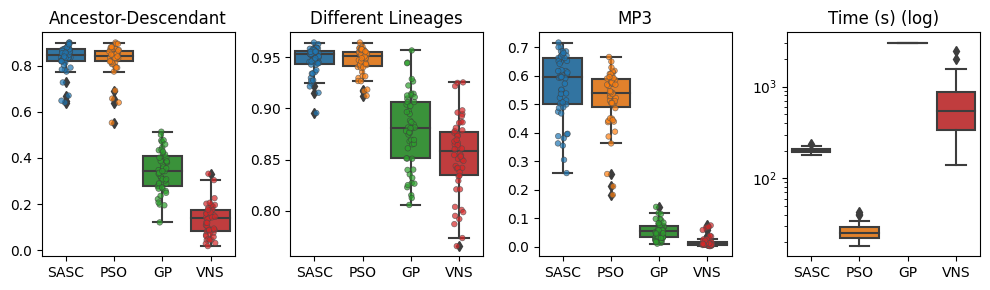

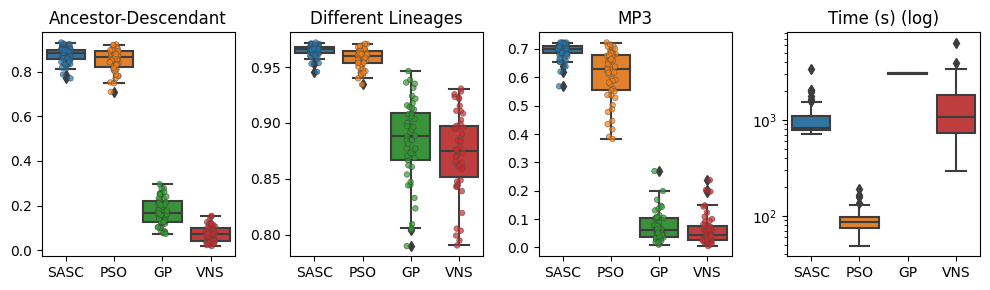

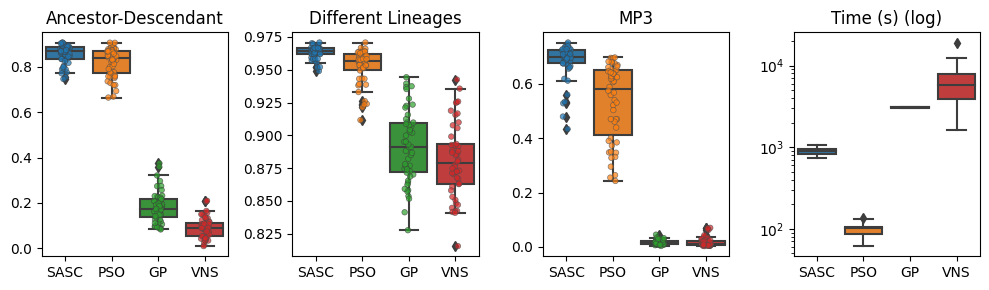

In [5]:
suppl = [" — Perfect Phylogeny", " — Dollo-3"]
for ix, exp in enumerate(["m15_n50_pp_fn20", "m15_n50_k3_fn20", "m30_n100_pp_fn20", "m30_n100_k3_fn20", "m50_n200_pp_fn20", "m50_n200_k3_fn20"]):
    df_ad, df_dl, df_mp3, df_time = load_data(exp)
    boxplot([df_ad, df_dl, df_mp3], df_time, out=f'plots/exp.{exp}.pdf', 
    out2=f'plots/exp.{ix+1}.fn20.pdf'
    )


## Plots for experiments with large mutation size =100,200

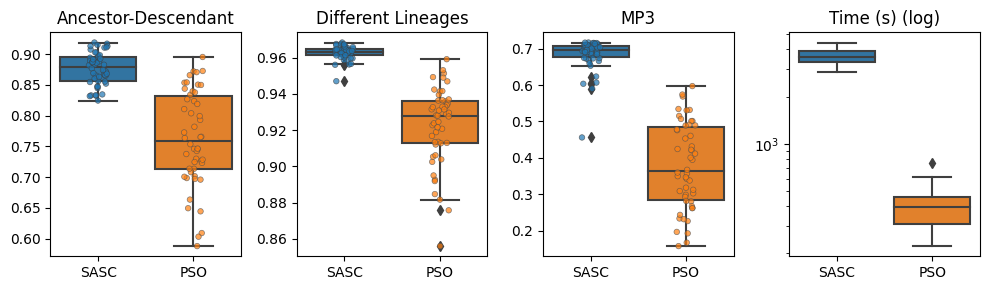

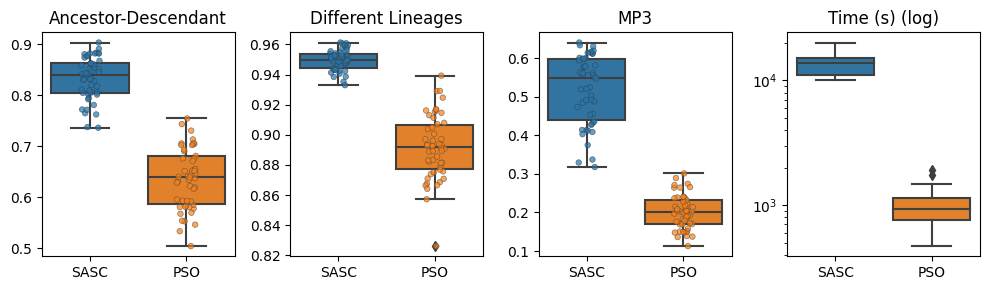

In [7]:
def boxplot_large(dfs, dftime, out=None, title=None, out2=None):
    f, ax = plt.subplots(1, 4, figsize=(10,3))
    for ix, df in enumerate(dfs):
        _ix = ix
        ax[_ix] = sns.boxplot(data=df, ax=ax[_ix], linewidth=1.5)
        ax[_ix] = sns.stripplot(data=df, ax=ax[_ix], alpha=.7, size=4, edgecolor="gray", linewidth=.5)
        ax[_ix].set(title=df["Measure"][0])
    ax[3] = sns.boxplot(data=dftime, x="tool", y="seconds", ax=ax[3], linewidth=1.5, order=["SASC", "PSO"])
    # ax[3] = sns.stripplot(data=dftime, x="tool", y="seconds", ax=ax[3], order=["SASC", "PSO", "GP", "VNS"], alpha=.7, size=4, edgecolor="gray", linewidth=.5)
    ax[3].set(xlabel="", ylabel="", title="Time (s) (log)")
    ax[3].set_yscale('log')

    if title:
        f.suptitle(title)

    plt.tight_layout()
    
    if out:
        f.savefig(out)
    if out2:
        f.savefig(out2)
    return ax

def load_data_large(exp):
    df_ad = pd.read_csv(f'csvs/exp_{exp}.anc_desc.csv')
    df_dl = pd.read_csv(f'csvs/exp_{exp}.diff_lin.csv')
    df_mp3 = pd.read_csv(f'csvs/exp_{exp}.mp3.csv')
    df_ad.columns=["SASC","PSO", "Measure"]
    df_dl.columns=["SASC","PSO","Measure"]
    df_mp3.columns=["SASC","PSO","Measure"]
    df_time = pd.read_csv(f'csvs/exp_{exp}.times.csv')
    #re-order to keep color consistency
    
    return df_ad, df_dl, df_mp3, df_time

suppl = [" — Perfect Phylogeny", " — Dollo-3"]
for ix, exp in enumerate(["m100_n200_k3", "m200_n200_k3"]):
    df_ad, df_dl, df_mp3, df_time = load_data_large(exp)
    boxplot_large([df_ad, df_dl, df_mp3], df_time, out=f'plots/exp.{exp}.pdf', 
    out2=f'plots/exp.{ix+1}.large.pdf'
    )
